# Project 2
## Lars Bosch, Philipp Brückelt, Thomas Engl

Import the python scripts and execute the code in this Notebook.

In [14]:
## import the python scripts
from neural_network import *
from data_sets import *
from optimizers import *
from compute import *

In [15]:
## import other modules
import autograd.numpy as np

# Regression
The following code constructs a neural network which approximates the 1D Runge function. The first example uses 2 hidden layers with 50 nodes and only the sigmoid function as activation function. The cost function is given by the MSE.

In [16]:
n = 1_000                                                # number of points

layer_output_sizes = [50, 50, 1]                         # define number of nodes in layers (output size is 1)
activation_funcs = [sigmoid, sigmoid, identity]          # activation functions
    
cost_fnc = mse                                           # choose mse as cost function
optimizer = Adam                                         # choose an optimization algorithm
output_size = 1

optimal learning rate:  0.049999999999999996
test MSE:  0.011043997629989701


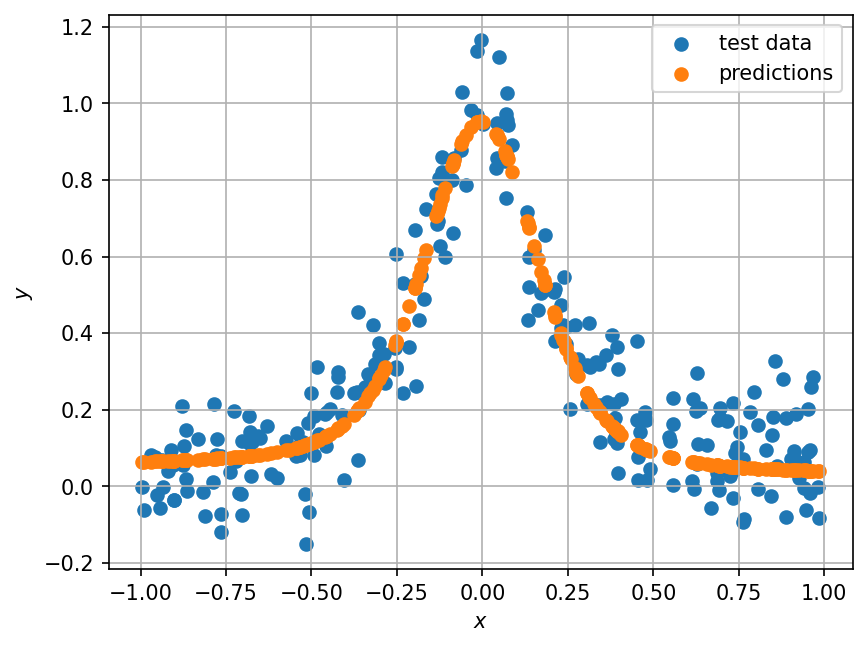

In [4]:
### 1D Runge function
np.random.seed(0)                                      # set a seed
input_size = 1
x_train, x_test, y_train, y_test = load_runge_data(n)    # load data
y_mean = y_train.mean()
data = get_scaled_data(x_train, x_test, y_train, y_test) # scale data
# tune the learning rate
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
print("optimal learning rate: ", eta_opt)

test_mse, predicts = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100, return_predicts=True)

print("test MSE: ", test_mse)
# plot approximation
plot_1D_approx(x_test, data[3] + y_mean, predicts + y_mean)

For comparison, we try our network with the same architecture, but ReLU instead of sigmoid in the first hidden layer.

optimal learning rate:  0.049999999999999996
test MSE:  0.010357894364666834


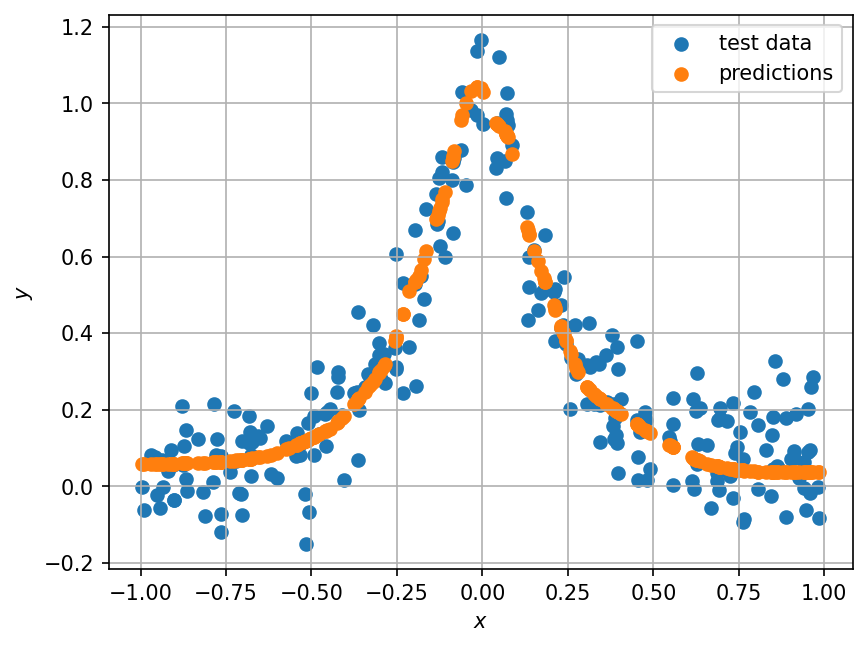

In [5]:
activation_funcs = [ReLU, sigmoid, identity]  # activation functions

# same code as before
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
print("optimal learning rate: ", eta_opt)

test_mse, predicts = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100, return_predicts=True)

print("test MSE: ", test_mse)
# plot approximation
plot_1D_approx(x_test, data[3] + y_mean, predicts + y_mean)

In [12]:
### compare this to networks with only one hidden layer with 50 or 100 nodes

activation_funcs = [sigmoid, identity] 
layer_output_sizes = [50, 1]
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
test_mse = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100)
print("Test MSE for one hidden layer with 50 nodes: ", test_mse)

layer_output_sizes = [100, 1]
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
test_mse = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100)
print("Test MSE for one hidden layer with 100 nodes: ", test_mse)

# two hidden layers with 50 and 100 nodes:

activation_funcs = [sigmoid, sigmoid, identity] 
layer_output_sizes = [50, 100, 1]
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
test_mse = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100)
print("Test MSE for two hidden layers with 50 and 100 nodes: ", test_mse)

# two hidden layers both with 100 nodes:

layer_output_sizes = [100, 100, 1]
eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimizer)
test_mse = test_accuracy(data, activation_funcs, layer_output_sizes, 
                         input_size, output_size, cost_fnc, 
                         optimizer(eta=eta_opt), epochs_=100)
print("Test MSE for two hidden layers with 100 and 100 nodes: ", test_mse)

Test MSE for one hidden layer with 50 nodes:  0.017461531173242135
Test MSE for one hidden layer with 100 nodes:  0.021781146483029992
Test MSE for two hidden layers with 50 and 100 nodes:  0.012570434112099217
Test MSE for two hidden layers with 100 and 100 nodes:  0.01410990421896507


## Test different network depths

We compute the train and test MSEs of neural networks with different numbers of hidden layers, using only sigmoid as activation function and 50 nodes per layer. 


number layers:  1
average test MSE  =  0.012425644694348759
average train MSE =  0.011286664155161507
number layers:  2
average test MSE  =  0.012941144066798232
average train MSE =  0.011567495355742011
number layers:  3
average test MSE  =  0.012376596046001533
average train MSE =  0.010771862091213932
number layers:  4
average test MSE  =  0.012946516058208235
average train MSE =  0.010938669543206169
number layers:  5
average test MSE  =  0.013455436395768915
average train MSE =  0.011348187906494014
number layers:  6
average test MSE  =  0.012954048326431118
average train MSE =  0.011109839849165758
number layers:  7
average test MSE  =  0.013707236216319935
average train MSE =  0.011952157447439906


C:\Users\HP\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


number layers:  8
average test MSE  =  0.1293561772593131
average train MSE =  0.1308834332036426


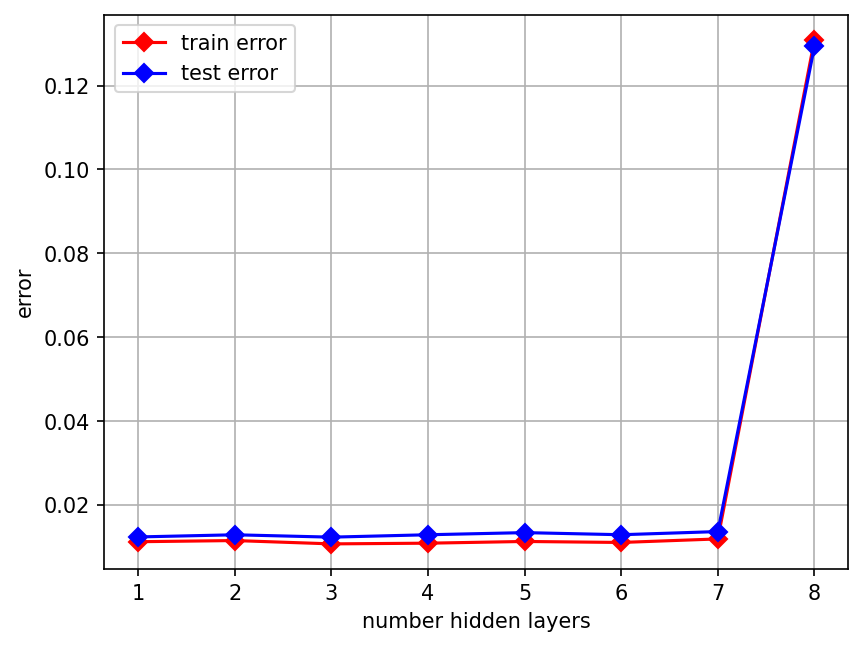

In [6]:
n = 1_000
input_size = 1
output_size = 1
cost_fnc = mse
# learning rate is tuned inside the function
optimizer = Adam
x_train, x_test, y_train, y_test = load_runge_data(n)
data = get_scaled_data(x_train, x_test, y_train, y_test)
# this function computes the train and test error for different layer sizes 
# and then plots the results
plot_train_test_errs(data, input_size, output_size, cost_fnc, optimizer)

## Analysis of learning rate

In the following, we briefly analyze the effect of the choice of learning rate and the optimizater on the test MSE. We use again sigmoid in both hidden layers.

C:\Users\HP\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\HP\Documents\Master Mathematik\Applied Data Analysis\Projects\Project2-Applied-ML\Code\neural_network.py:212: RuntimeWarning: overflow encountered in matmul
  dC_da = dC_dz @ W.T
C:\Users\HP\Documents\Master Mathematik\Applied Data Analysis\Projects\Project2-Applied-ML\Code\neural_network.py:213: RuntimeWarning: invalid value encountered in multiply
  dC_dz = dC_da * activation_der (z)


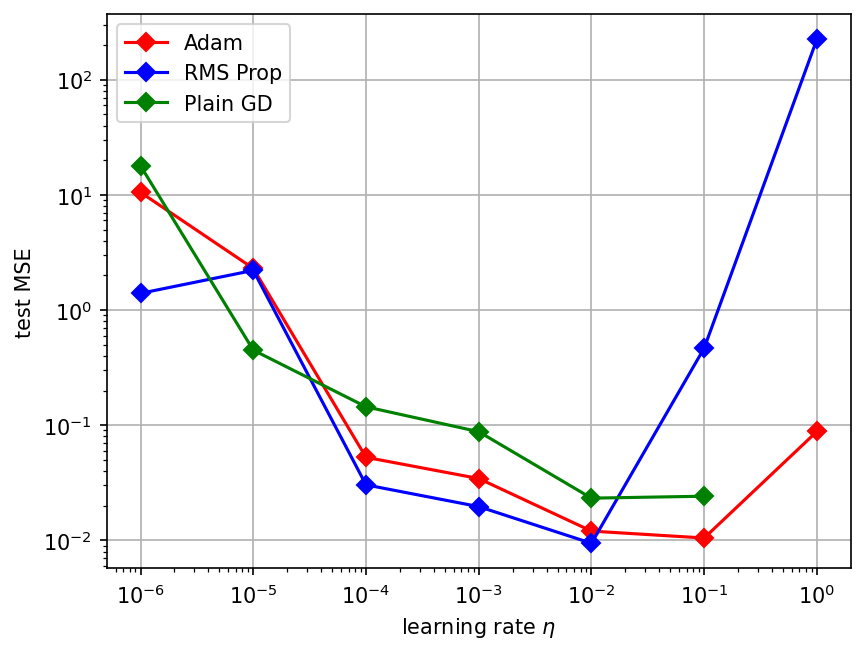

optimal learning rate Adam:  0.049999999999999996
MSE Adam with optimal eta:  0.009785948399621837 

optimal learning rate RMS_prop:  0.01
MSE RMS_prop with optimal eta:  0.05758471519171276 

optimal learning rate Constant:  0.004999999999999999
MSE Constant with optimal eta:  0.03188784285778214 



In [6]:
n = 1_000
np.random.seed(123)                                      # set a seed
input_size = 1
x_train, x_test, y_train, y_test = load_runge_data(n)    # load data
data = get_scaled_data(x_train, x_test, y_train, y_test) # scale data
activation_funcs = [sigmoid, sigmoid, identity] 

etas = np.logspace(-6, 0, 7)

# using Adam
mses_adam = [test_accuracy(data, activation_funcs, layer_output_sizes, 
                           input_size, output_size, cost_fnc, 
                           Adam(eta=eta_), epochs_=100) for eta_ in etas]
# using RMS Prop
mses_rms = [test_accuracy(data, activation_funcs, layer_output_sizes,
                          input_size, output_size, cost_fnc,
                          RMS_prop(eta=eta_), epochs_=100) for eta_ in etas]
# plain gradient descent
mses_plain = [test_accuracy(data, activation_funcs, layer_output_sizes,
                            input_size, output_size, cost_fnc,
                            Constant(eta=eta_), epochs_=100) for eta_ in etas]

plt.figure(dpi=150)
plt.loglog(etas, mses_adam, marker='D', color='red', label='Adam')
plt.loglog(etas, mses_rms, marker='D', color='blue', label='RMS Prop')
plt.loglog(etas, mses_plain, marker='D', color='green', label='Plain GD')
plt.xlabel(r'learning rate $\eta$')
plt.ylabel('test MSE')
plt.legend()
plt.grid()
plt.show()

# compare to eta_opt found by our tuning method
# result may not be the very best, because we use random search, but it should be close

for optimizer in [Adam, RMS_prop, Constant]:
    eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                                 input_size, output_size, cost_fnc, optimizer)
    print("optimal learning rate {}: ".format(str(optimizer.__name__)), eta_opt)
    test_mse_opt = test_accuracy(data, activation_funcs, layer_output_sizes, 
                                 input_size, output_size, cost_fnc, 
                                 optimizer(eta=eta_opt), epochs_=100)
    print("MSE {} with optimal eta: ".format(str(optimizer.__name__)), test_mse_opt, "\n")

Next, we also investigate the tuned learning rate and test MSE for the three optimizers when different numbers of hidden layers are implemented.

In [4]:
number_hidden_layers = [1, 2, 3, 4, 5]
n = 1_000
optimizers = [Adam, RMS_prop, Constant]
x_train, x_test, y_train, y_test = load_runge_data(n)
data = get_scaled_data(x_train, x_test, y_train, y_test)

for i in number_hidden_layers:
    print("number hidden layers :", i, "\n")
    layer_output_sizes = [50 for _ in range(i)]
    layer_output_sizes.append(1)
    activation_funcs = [sigmoid for _ in range(i)]
    activation_funcs.append(identity)
    for optimizer in optimizers:
        np.random.seed(123)
        eta_opt = tune_learning_rate(data, activation_funcs, layer_output_sizes, 
                                     1, 1, mse, optimizer)
        test_mse = test_accuracy(data, activation_funcs, layer_output_sizes, 
                                 1, 1, mse, optimizer(eta=eta_opt), epochs_=500)
        print("optimal learning rate for {}: ".format(str(optimizer.__name__)),
              eta_opt)
        print("test MSE for {}: ".format(str(optimizer.__name__)), test_mse, "\n")

number hidden layers : 1 

optimal learning rate for Adam:  0.38713184134056344
test MSE for Adam:  0.009257729382123846 

optimal learning rate for RMS_prop:  0.38713184134056344
test MSE for RMS_prop:  0.08904232432795844 



C:\Users\HP\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


optimal learning rate for Constant:  0.03871318413405634
test MSE for Constant:  0.016197304534118388 

number hidden layers : 2 

optimal learning rate for Adam:  0.049999999999999996
test MSE for Adam:  0.008760353681469298 

optimal learning rate for RMS_prop:  0.0017969068319023127
test MSE for RMS_prop:  0.009531320619952734 

optimal learning rate for Constant:  0.00038713184134056344
test MSE for Constant:  0.04610300757385071 

number hidden layers : 3 

optimal learning rate for Adam:  0.08340502686000295
test MSE for Adam:  0.009338476531872046 

optimal learning rate for RMS_prop:  0.1
test MSE for RMS_prop:  1.201458336950458 

optimal learning rate for Constant:  0.023207944168063883
test MSE for Constant:  0.010696696587112559 

number hidden layers : 4 

optimal learning rate for Adam:  0.002997421251594704
test MSE for Adam:  0.01050393276959412 

optimal learning rate for RMS_prop:  0.0645774832507442
test MSE for RMS_prop:  1.2286513698561494 

optimal learning rate f

## Analysis of regularization

Compare test MSE with and without regularization. We use Adam with learning rate $\eta = 0.01$. The activation functions are defined inside the function test_different_layers which is called in heat_map_test_accuarcy. The choice of the activation functions is intended to not be optimal, since we want to see if regularization can improve the test MSE.

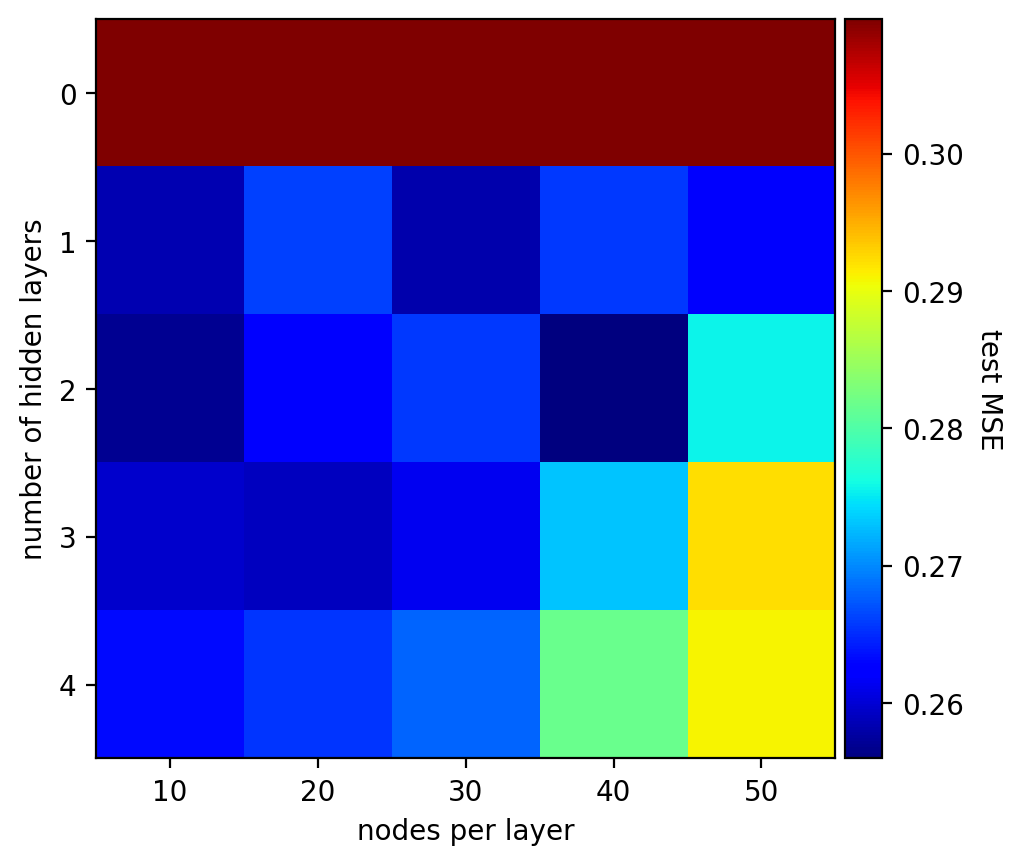

0.03871318413405634
3.871318413405634
0.049999999999999996
0.004999999999999999
0.5
8.340502686000295e-06
4.9999999999999996e-06
4.9999999999999996e-06
8.340502686000295e-06
5e-07
4.9999999999999996e-05
0.0013912797011035628
0.0001
0.008340502686000294
0.00038713184134056344
2.3207944168063906e-06
1.7969068319023124e-05
2.3207944168063906e-05
0.002320794416806388
0.0002997421251594704
6.457748325074412e-07
0.0006457748325074419
1.7969068319023127e-06
5e-07
0.0008340502686000295


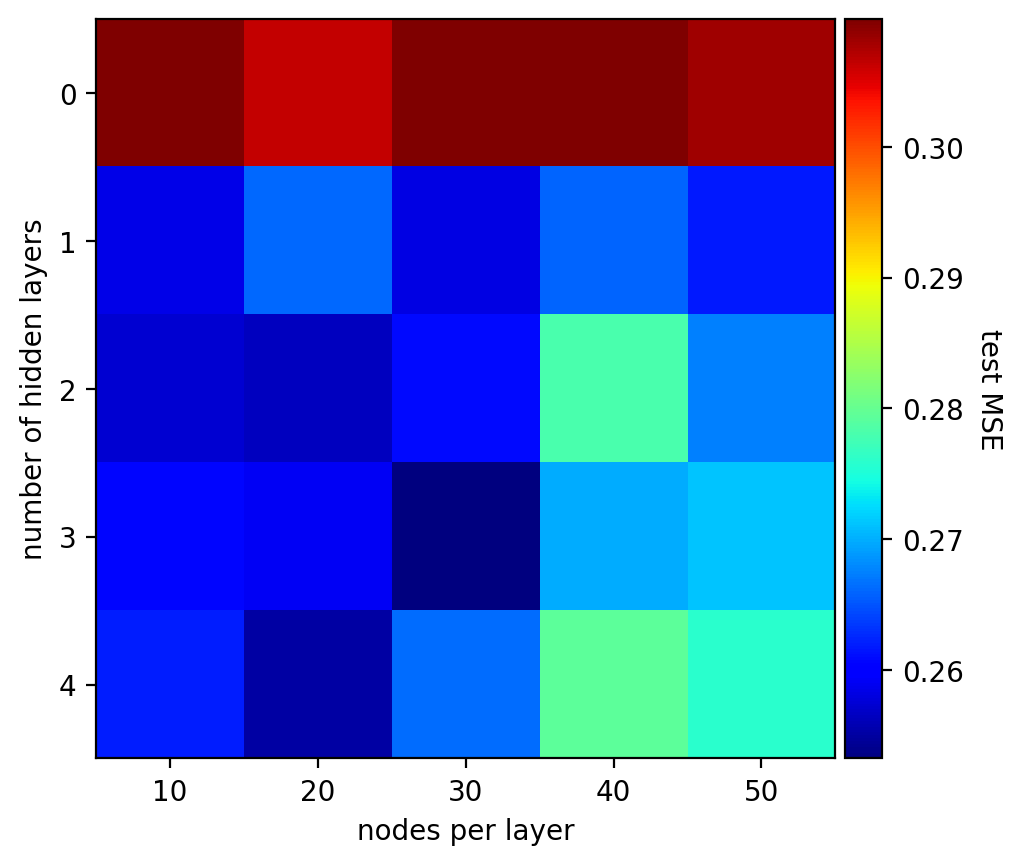

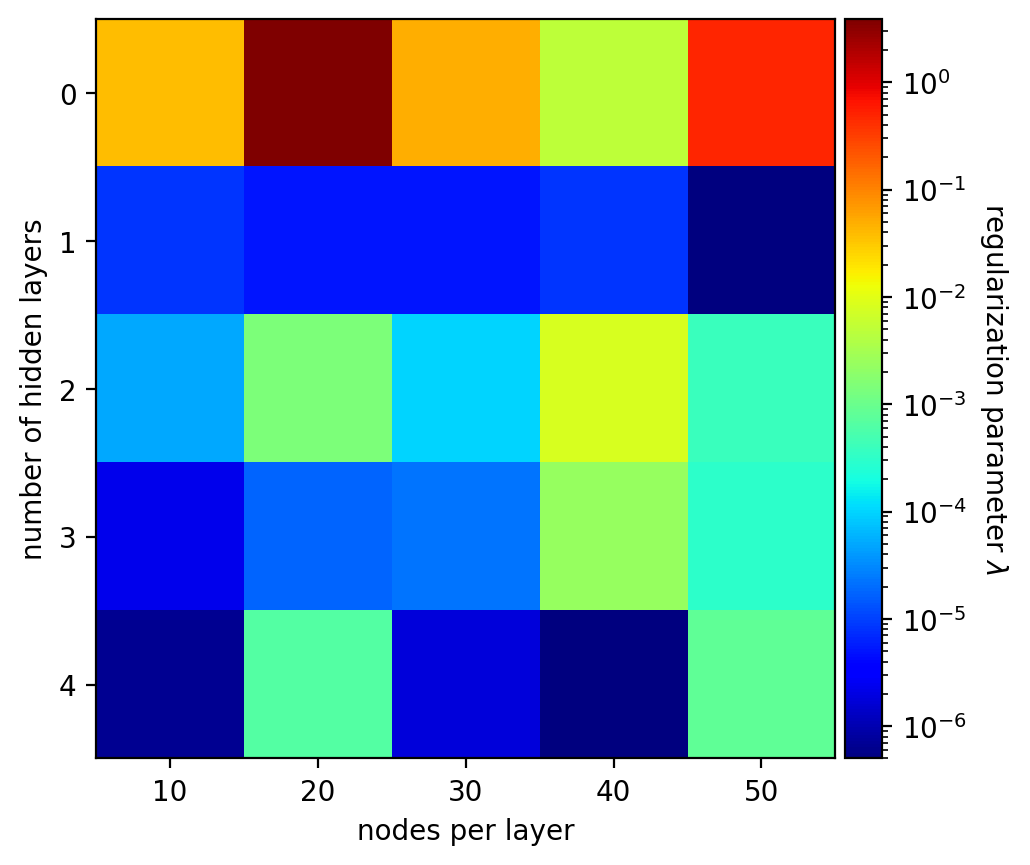

0.5
0.2320794416806389
0.03871318413405634
0.5
1.7969068319023138
5e-07
5e-07
1e-06
5e-07
3.8713184134056384e-05
0.0013912797011035628
0.002997421251594704
0.00013912797011035626
0.0013912797011035628
0.0017969068319023127
4.9999999999999996e-06
0.001
0.0038713184134056343
0.004999999999999999
0.01391279701103562
1.7969068319023124e-05
2.3207944168063906e-06
5e-07
0.001
0.006457748325074419


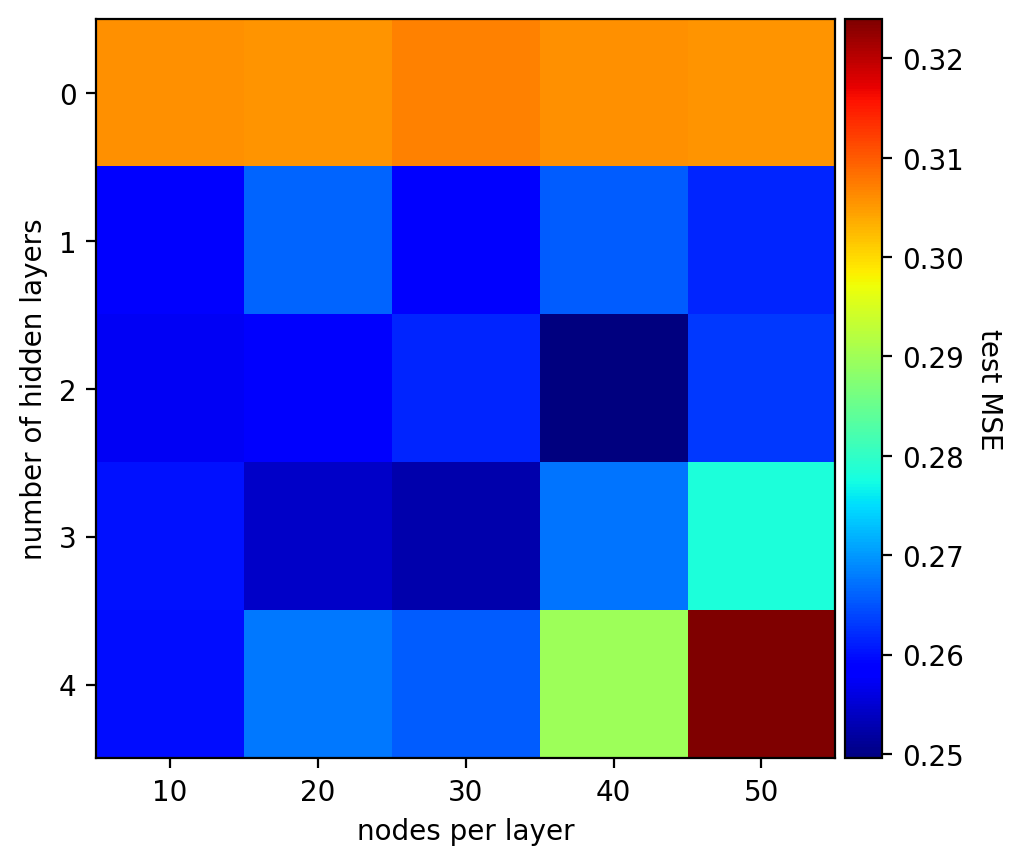

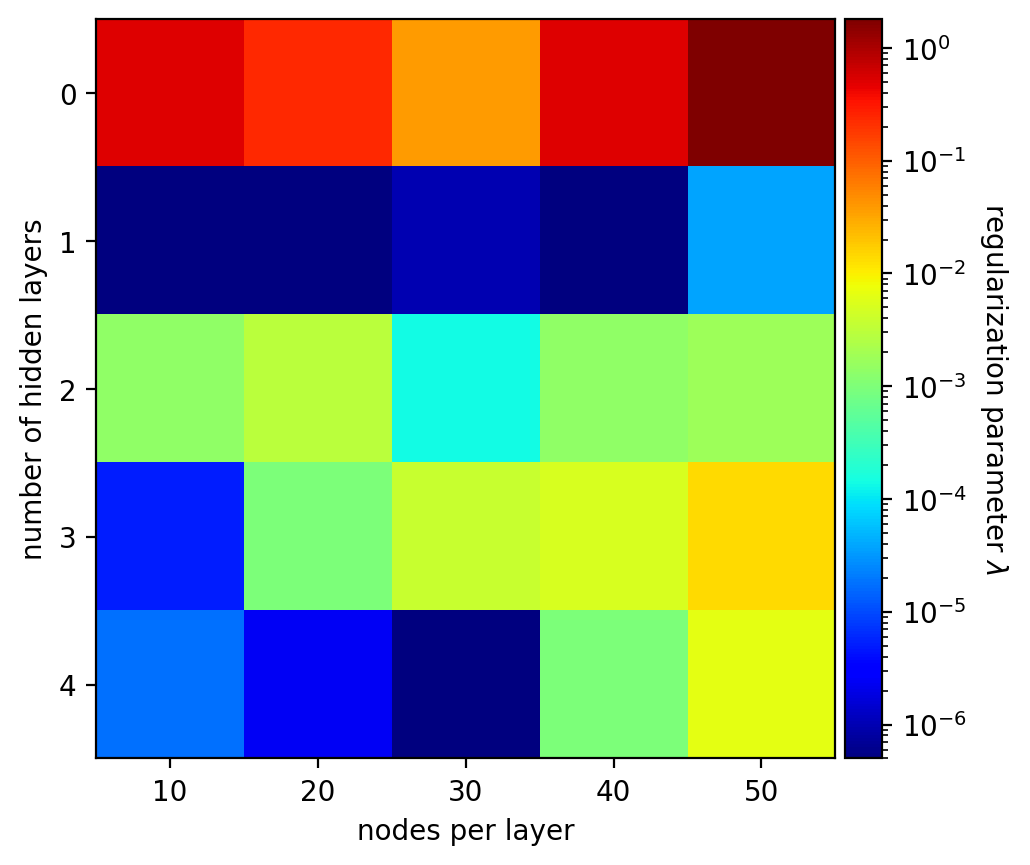

In [7]:
np.random.seed(0)

optimizer_ = Adam(eta=0.01)
number_hidden_layers = [0, 1, 2, 3, 4]
nodes_per_layer = [10, 20, 30, 40, 50]

x_train, x_test, y_train, y_test = load_runge_data(n, sigma=0.5)
data = get_scaled_data(x_train, x_test, y_train, y_test)

# without regularization
heat_map_test_accuracy(data, number_hidden_layers, nodes_per_layer,
                       input_size, output_size, cost_fnc, optimizer_,
                       epochs=300)

# with L^2 regularization
heat_map_test_accuracy(data, number_hidden_layers, nodes_per_layer,
                       input_size, output_size, cost_fnc, optimizer_,
                       reg='L2', epochs=300)

# with L^1 regularization
heat_map_test_accuracy(data, number_hidden_layers, nodes_per_layer,
                       input_size, output_size, cost_fnc, optimizer_,
                       reg='L1', epochs=300)

# Extension - multi-dimensional functions
We can also try more sophisticated functions, e.g., the 2D Runge function or the Rastrigin function
$$
f \colon \mathbb{R}^d \to \mathbb{R}, \quad f(x) := Ad + \sum_{i=1}^d \left( x_i^2 - 10 \cos(2 \pi x_i) \right)
$$
where $A \in \mathbb{R}$ is a constant, usually $A = 10$.

In [17]:
""" test how the network performs in different dimensions d = 2,...,5 (This takes a while, approximately 12 minutes
for the 5-dimensional case).
The following functions first tunes the learning rate of a given optimizer. Afterwards, we compute the test MSE
and stop the runtime of the latter computation.
We do this for networks with two hidden layers and 50 nodes per layer. The activation function is always sigmoid.
"""
optimizer = Adam
activation_funcs = [sigmoid, identity]
layer_output_sizes = [50, 1]
np.random.seed(123)
test_dimensionality(activation_funcs, layer_output_sizes, optimizer)

d        =  2
optimal learning rate :  0.5
test_mse =  0.04477048957758909
time     =  1.4578729999998359 

d        =  3
optimal learning rate :  1.0
test_mse =  0.09873400789459592
time     =  15.43234130000019 

d        =  4
optimal learning rate :  0.5
test_mse =  0.2164197458861288
time     =  270.70333600000004 

d        =  5
optimal learning rate :  0.6457748325074419
test_mse =  0.0813802952620243
time     =  729.2979129000005 



([0.04477048957758909,
  0.09873400789459592,
  0.2164197458861288,
  0.0813802952620243],
 [1.4578729999998359,
  15.43234130000019,
  270.70333600000004,
  729.2979129000005])